In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic Regression

A key drawback of k-nearest neighbors is that making predictions can be slow because it needs to calculate the distance between the new data and every point in the training set.
These distance calculations can be time-consuming.
Logistic regression offers a faster alternative, though it comes with its own limitations, which we’ll explore later.

Contents:

- [Introduction to logistic regression](#1.-Introduction-to-logistic-regression)
- [Logistic Regression Classification Examples](#2.-Logistic-Regression-Classification-Examples)

## 1. Introduction to logistic regression

Logistic regression is a basic linear model used for binary classification (i.e., two classes). A "linear model" means the decision boundary it creates is a straight line (or a hyperplane in higher dimensions), which works best when the classes are linearly separable.

In logistic regression, one class is represented by $y=0$, and the other class is represented by $y=1$.

**1-dimensional dataset example**

![log-ex1](images/log-ex1.png)

The plot shows how logistic regression assigns classes $y=0$ (blue) and $y=1$ (orange) to the data points for a one-dimensional dataset.
On the left, you can see the data points plotted along the x-axis, where each point is labeled as either class 0 or class 1.
On the right, the data points are shown along the y-axis based on their class labels, with class 0 at the bottom and class 1 at the top.

**2-dimensional dataset example**

![log-ex2](images/log-ex2.png)

The plot shows how logistic regression assigns classes $y=0$ (blue) and $y=1$ (orange) to the data points for a two-dimensional dataset.
On the left, the data points are plotted based on their two features, with each point labeled as either class 0 or class 1.
On the right, the same data points are transformed into a 3D space by logistic regression. 
The vertical axis shows how the model "lifts" the points, making it easier to separate the two classes.
Class 0 points (blue) are pushed downward, and class 1 points (orange) are lifted upward.

Logistic regression models the probability of two classes using the **sigmoid function**, which maps any input to a value between 0 and 1:

$$
\sigma(t) = \frac{1}{1+e^{-t}}
$$

This function is used to estimate the probability that a data point belongs to class 1.
If the output is close to 1, the model predicts class 1; if it’s close to 0, the model predicts class 0.

Below, you can see the sigmoid function, which maps any input value to a probability between 0 and 1. As the input increases, the output shifts from 0 to 1. 

![logistic funcion](images/logistic.png)

For a data point $\begin{bmatrix} x_1 & x_2 & \cdots & x_n \end{bmatrix}$, a logistic regression model predicts using the formula:

$$
\mbox{prediction} \quad p = \sigma(\theta_0 + x_1\theta_1+\cdots+x_n\theta_n) \quad \quad \mbox{where} \quad \quad 
\sigma(t) = \frac{1}{1+e^{-t}}.
$$

Here, $\theta_1,\theta_2,\ldots,\theta_n$ are the model parameters (also called weights), which are learned during the `.fit()` process.
The model adjusts these parameters to minimize the difference between the predicted and actual $y$ values in the training data

Logistic regression converts the predicted probability $p$ into a binary outcome using the rule:

$$
y = \left\{\begin{array}{lr}
0 & \mbox { if }\quad p<0.5\\
1 & \mbox{ if }\quad p\geq 0.5
\end{array}\right.
$$

**1-dimensional dataset example**

Back to our one-dimensional example, the plot above shows the fitted logistic regression model in red. 
The dashed line indicates the decision boundary, where the predicted probability is 0.5.
At this point, the model switches from predicting class 0 to class 1.

![log-ex1-fitted](images/log-ex1-fitted.png)

**2-dimensional dataset example**

For the two-dimensional example, the plot on the left shows the fitted logistic regression model as a red surface.
The plot on the right shows the same classification boundary from a top-down view, where the decision boundary separates the two regions, with the background colors indicating the predicted class for each region (blue for class 0, yellow for class 1).

![log-ex2-fitted](images/log-ex2-fitted.png)

What we’ve described so far is the basic logistic regression model for binary (two-class/label) classification problems. There is also a multinomial version for handling two or more classes/labels, which follows a similar approach. We cover this in detail in another course, M462-M562, so we won’t go into it further here.

Scikit-learn, of course, provides an implementation of logistic regression that handles any number of classes.

In [2]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

**Key `LogisticRegression` hyperparameters:**

| hyperparameter      | description |
| :-- | :-- |
| `C`      | Inverse of regularization strength. Smaller values specify stronger regularization (default `C=1`). We will cover regularization later in the course.
| `class_weight`   | Weights assigned to each class. If not set, all classes are weighted equally. Setting `class_weight='balanced'` gives more emphasis to the minority class. We will discuss class weights later in the course. |

For now, we won’t worry about these hyperparameters, as we’ll cover them later in the course.

## 2. Logistic Regression Classification Examples

Let’s see logistic regression in action. We’ll train it on the same toy datasets we used for the k-nearest neighbors model in the previous notebook. For each dataset, we’ll plot the classification boundaries for each class. The key point to note is that logistic regression is a linear classifier, meaning its classification boundaries are straight lines.

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay

- [Three-blobs dataset](#Example-1:-Three-blobs-dataset)
- [Two-moons dataset](#Example-2:-Two-moons-dataset)
- [Two-circles dataset](#Example-3:-Two-circles-dataset)

### Example 1: Three-blobs dataset

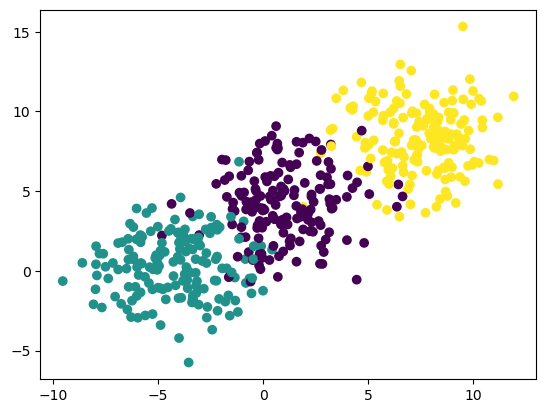

In [19]:
from sklearn.datasets import make_blobs

# generate a toy dataset with three blobs
X,y = make_blobs(n_samples=500, 
                 centers = 3, 
                 cluster_std=2,
                 random_state=3)

# plot dataset
plt.scatter(X[:, 0], X[:, 1], 
            c=y)

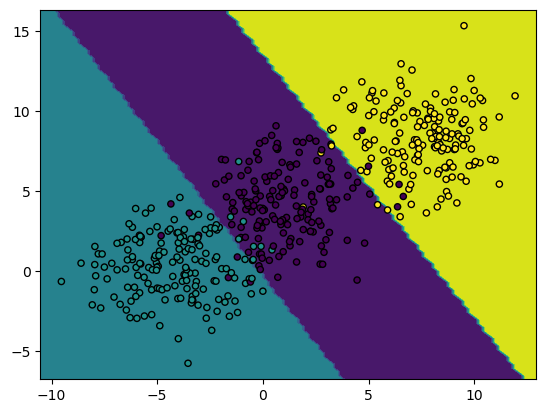

In [5]:
# instantiate the model
logreg_clf = LogisticRegression()

# fit the model
logreg_clf.fit(X, y)

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(logreg_clf, X)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

The dataset shown is linearly separable.
Distinct classes can be separated by straight lines. 
As a result, logistic regression does a good job in this case, with clear, straight classification boundaries between the different regions.

### Example 2: Two-moons dataset

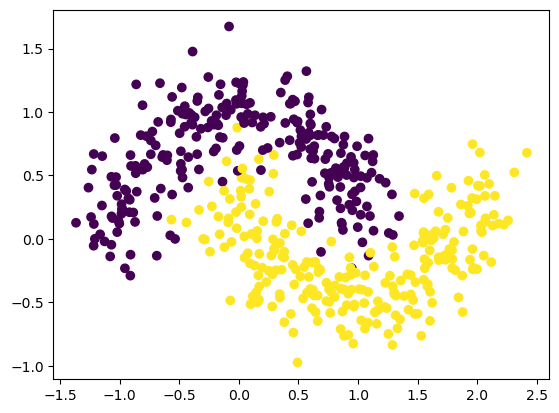

In [6]:
# Generate the two-moons dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,
                 noise=0.2)

# plot dataset
plt.scatter(X[:,0],X[:,1],c=y)

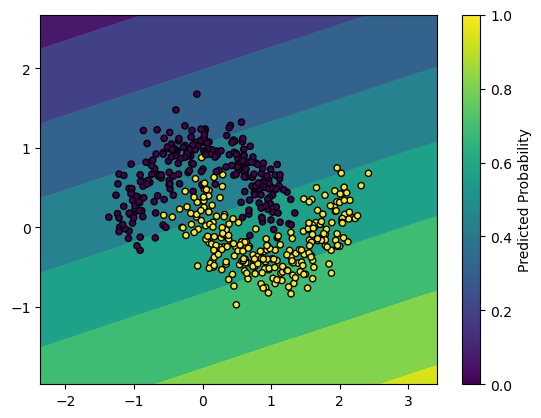

In [7]:
# instantiate the model
logreg_clf = LogisticRegression()

# fit the model
logreg_clf.fit(X, y)

# Plot the decision regions
DecisionBoundaryDisplay.from_estimator(logreg_clf, X)
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
# plot colorbar
plt.colorbar(label='Predicted Probability')

This dataset is not linearly separable.
The classes cannot be perfectly divided by a straight line. 
As a result, logistic regression still tries to find the best linear decision boundary, but it struggles to fully capture the separation between the two classes.

The multiple lines in the plot represent different levels of predicted probabilities, indicating how the model gradually transitions from one class to another rather than making a sharp distinction.

To better interpret the plot, we can add a color bar showing the predicted probabilities for class 1 (yellow) from the logistic regression model.

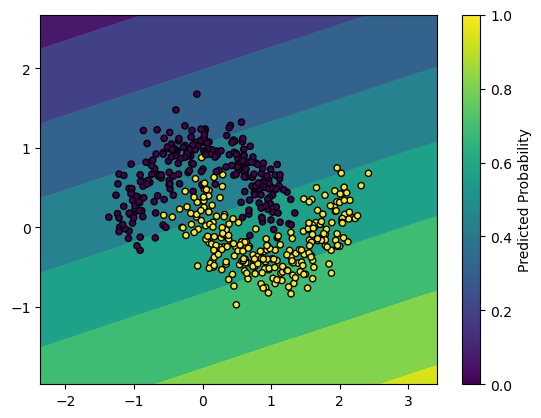

In [8]:
# instantiate the model
logreg_clf = LogisticRegression()

# fit the model
logreg_clf.fit(X, y)

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(logreg_clf, X)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Add a color bar to show the predicted probabilities
plt.colorbar(label='Predicted Probability')

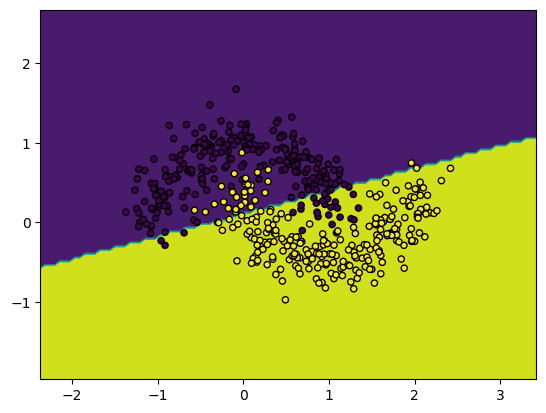

In [9]:
# Instantiate the model
logreg_clf = LogisticRegression()

# Fit the model
logreg_clf.fit(X, y)

# Plot only the decision boundary (no probability shading)
DecisionBoundaryDisplay.from_estimator(logreg_clf, X, response_method="predict")

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

### Example 3: Two-circles dataset

This is another example of non-linearly separable toy data, where logistic regression will struggle to make accurate predictions.

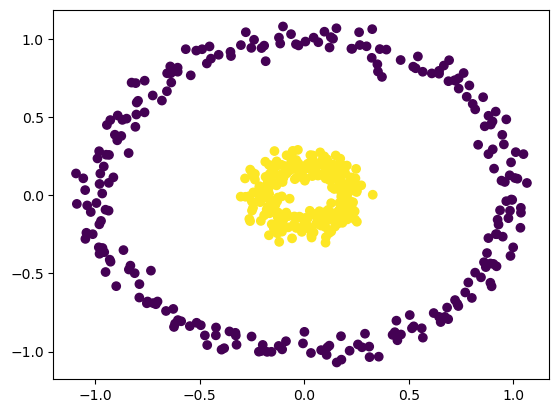

In [10]:
# run this cell to generate and plot the second toy dataset
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500,noise=0.05, factor=0.2)

# plot dataset
plt.scatter(X[:,0],X[:,1],c=y)

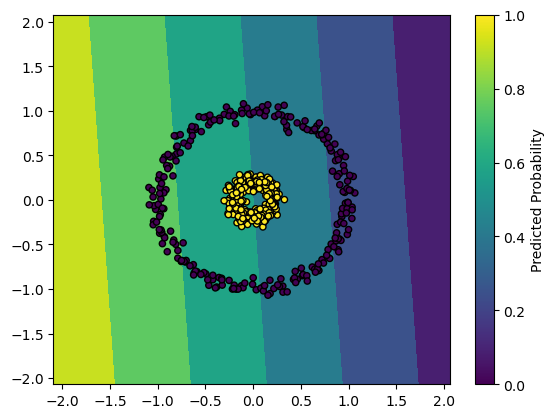

In [13]:
# instantiate the model
logreg_clf = LogisticRegression()

# fit the model
logreg_clf.fit(X, y)

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(logreg_clf, X)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)

# Add a color bar to show the predicted probabilities
plt.colorbar(label='Predicted Probability')

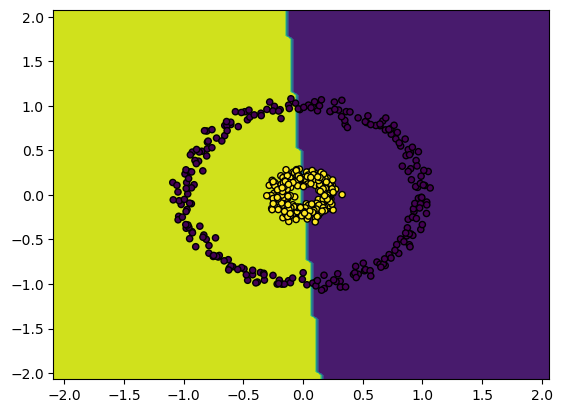

In [12]:
# instantiate the model
logreg_clf = LogisticRegression()

# fit the model
logreg_clf.fit(X, y)

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(logreg_clf, X, response_method="predict")

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)